Exemplo de Regressão:

Que é um tipo de Aprendizagem de Máquina -> Supervisionado -> Temos :

*   Classificação
*   Regressão

Onde coseguir dados: Em repositório online

Repositórios online:
UCI Machine Learning Repository https://archive.ics.uci.edu/
Kaggle datasets https://www.kaggle.com/datasets
Public Data Sets - AWS https://registry.opendata.aws/

Meta portais:
Data Portals https://dataportals.org/
OpenDataMonitor https://www.opendatamonitor.eu/
Quandl https://www.quandl.com/

Páginas com repositórios:
Wikipedia https://homl.info/9
Quora https://homl.info/10
Reddit https://www.reddit.com/r/datasets



Dataset do Scikit-learm:
https://scikit-learn.org/stable/datasets

In [2]:
# Importando as bibliotecas necessárias
from sklearn.datasets import load_diabetes
import numpy as np

# Carregando o conjunto de dados
diabetes = load_diabetes()

diabetes.keys()

X, y = diabetes.data, diabetes.target


#Verificando como os dados estão distribuidos
X.shape, y.shape

((442, 10), (442,))

In [3]:
print(diabetes.DESCR);

#caracteristicas
print("\n\ncaracteristicas: ",diabetes.feature_names);

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

0


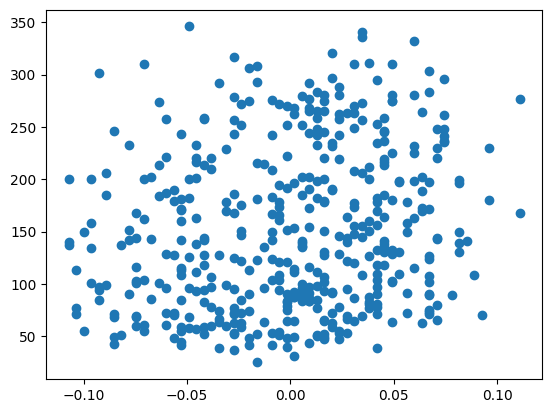

1


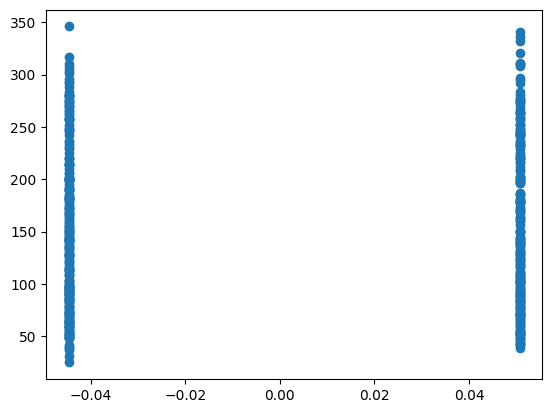

2


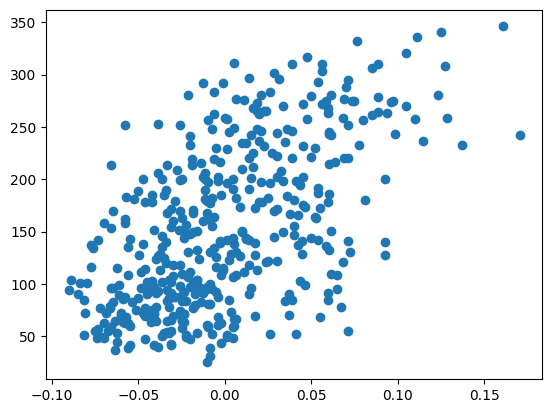

3


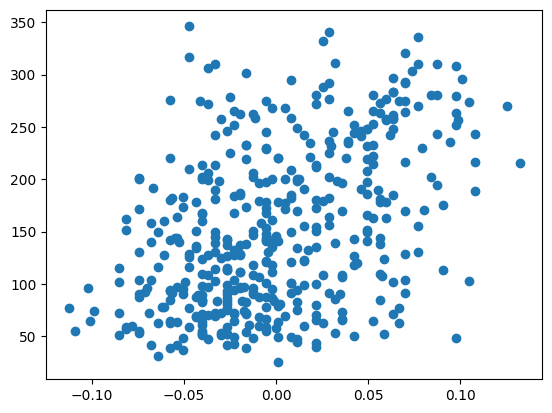

4


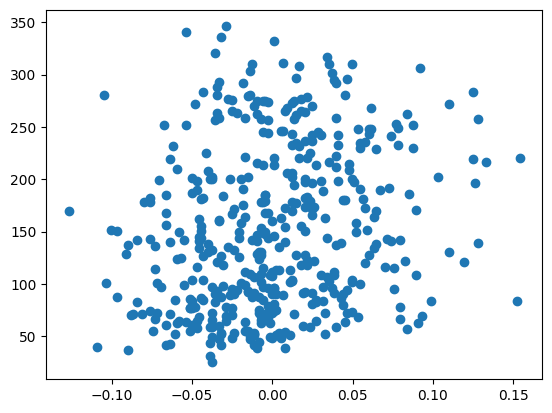

5


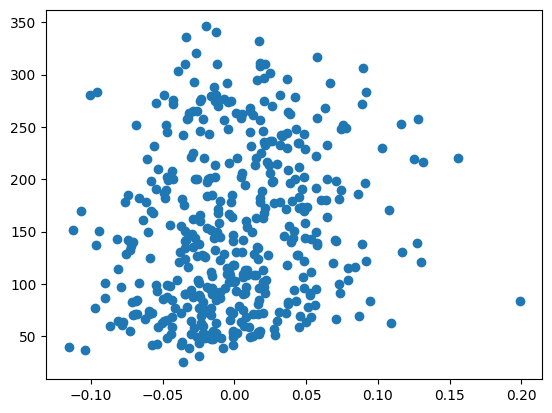

6


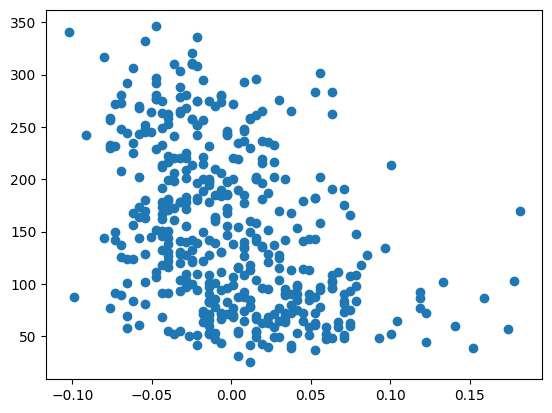

7


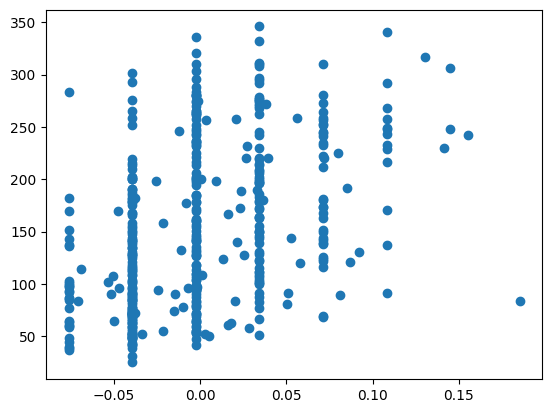

8


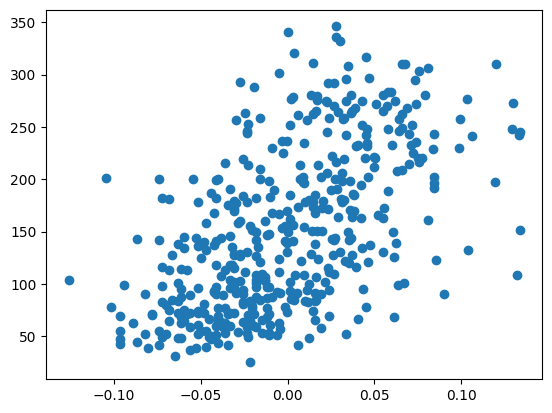

9


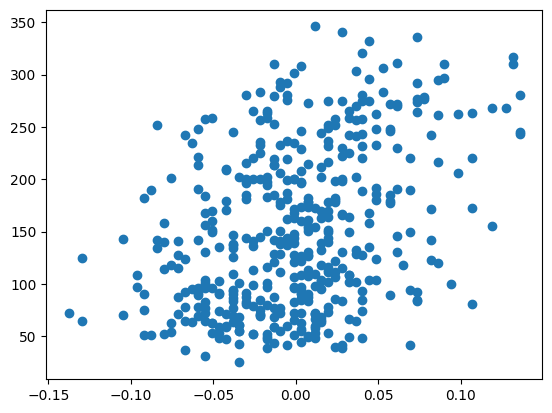

In [4]:
import matplotlib.pylab as plt

#plotando grafico para cada coluna, que é uma caracteristica do dataframe
for i in range(X.shape[1]):
    print(i)
    # X[:,i] - vai percorrer
    plt.scatter(X[:,i],y)
    plt.show()


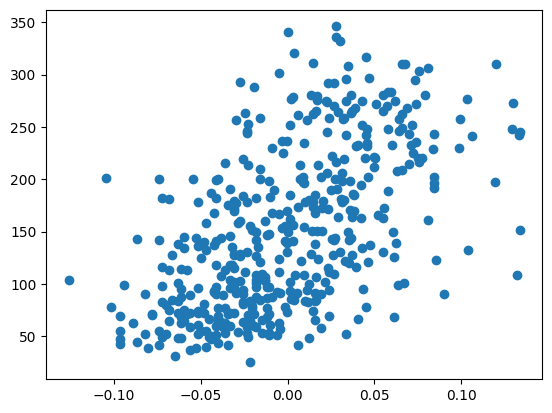

In [5]:
#Usando a coluna 8 para tentar montar uma equação do modelo Linear
X8_vet = X[:,8] # retorna um vetor

#Transfoemando o Vetor em Array
X8 = []
for elemento in X8_vet:
        X8.append([elemento])

#Convertendo para numpay array
X8 = np.asarray(X8)

plt.scatter(X8,y)
plt.show()



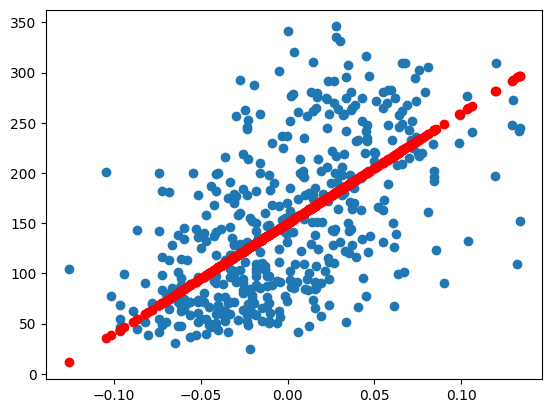

In [6]:
#Criando o modelo
def modelo_linear(X, a, b):
  y=a*X + b
  return y

ypred = modelo_linear(X8,1100,150)



#Plotando os graficos
plt.scatter(X8,y)
plt.scatter(X8,ypred, color='r')
plt.show()

In [7]:
#Calculando o erro do Modelo - Erro Médio Absoluto (mae)
def  mae(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yAbs = abs(yDiff)
  errorSum = sum(yAbs)
  mae = errorSum/len(yAbs)
  return mae

ypred = modelo_linear(X8,1000,145)

mae(y,ypred)

array([50.9864969])

**Esperado um erro grande, pois as amostras estão muito espalhadas, não tendo uma distribuição linear**
Variei os valores de "a" e "b" do modelo, mas o menor erro que achei foi 50

In [8]:
#Calculando o erro do Modelo - Com função Quadratica - mse
def  mse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare =  yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return mse

ypred = modelo_linear(X8,1000,145)
mse(y,ypred)

array([4097.79694773])

In [9]:
#Calculando o erro do Modelo - Com Raiz do Erro Quadratico Médio / Root Mean Absolute Error - rmse
from math import sqrt

def  rmse(y, ypred):
  yDiff = ypred - y.reshape(-1,1)
  yDiffSquare =  yDiff**2
  errorSum = sum(yDiffSquare)
  mse = errorSum/len(yDiffSquare)
  return sqrt(mse)

ypred = modelo_linear(X8,1000,145)
rmse(y,ypred)

64.01403711478771

In [10]:
#usando função da biblioteca sklearn.metrics para calcular o erro
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(y, ypred):
  mse = mean_squared_error(y, ypred)
  return  sqrt(mse)

ypred = modelo_linear(X8,1000,145)
rmse(y,ypred)



64.01403711478774

O **coeficiente angular** corresponde, na função (Y=ax+b), ao 'a':

No gráfico, é a tangente do ângulo α (alfa), formado pela intersecção entre a reta da função e o eixo x.

o **coeficiente linear** corresponde, na função, ao 'b'. No gráfico, é o ponto de interseção entre a reta da função e o eixo y.

170.51240981363347
63.490146657503374


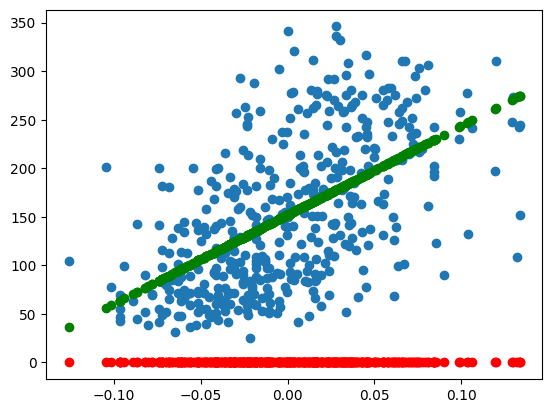

(916.137374550914, 152.13348416289585)

In [11]:
#criando uma classe para fazer um modelo de regressão utilizando calculando  o coeficientes Angular e Linear
from sklearn.metrics import mean_squared_error

class regressao_linear():
  def __init__(self):
    self.a = 0
    self.b = 0
  def fit(self,X,y):
      # tanho da amostra
      n = len(X)
      # Cálculo das médias
      X_mean = sum(X) / n
      Y_mean = sum(y) / n
      # Cálculo dos coeficientes
      numerator = 0
      denominator = 0
      for i in range(n):
          numerator += (X[i] - X_mean) * (y[i] - Y_mean)
          denominator += (X[i] - X_mean) ** 2
      self.a = numerator[0] / denominator[0]
      self.b = Y_mean - self.a * X_mean[0]   #y=ax+b   b = y-ax
      ypred = self.predict(X8)
      erro_anterior =rmse(y,ypred)
      for _ in range(50):
        ypred = self.predict(X8)
        erro = ypred - y.reshape(-1,1)
        ajusteB = (sum(erro)/len(erro))
        self.b = self.b - 0.1 * ajusteB[0]
        erro_atual =rmse(y,ypred)
        if erro_atual >= erro_anterior:
          break
        erro_anterior = erro_atual

  def predict(self,X):
    y= self.a*X + self.b
    return y


plt.scatter(X8,y)
modelo = regressao_linear()
ypred = modelo.predict(X8)

#print(mean_squared_error(y,ypred))
print(rmse(y,ypred))
plt.scatter(X8,ypred, color='r')

#Testando o  modelo ajustado
modelo.fit(X8,y)
ypred = modelo.predict(X8)
#print(mean_squared_error(y,ypred))
print(rmse(y,ypred))
plt.scatter(X8,ypred, color='g')

plt.show()

modelo.a, modelo.b

In [12]:
import numpy as np

# Dados de exemplo
X = X8
Y = y

# Adicionar uma coluna de 1s para representar o intercepto
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Calcular os coeficientes usando álgebra linear
coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

# Coeficientes da regressão
intercept = coefficients[0]
slope = coefficients[1]

coefficients

array([152.13348416, 916.13737455])

170.51240981363347
63.49014665750337


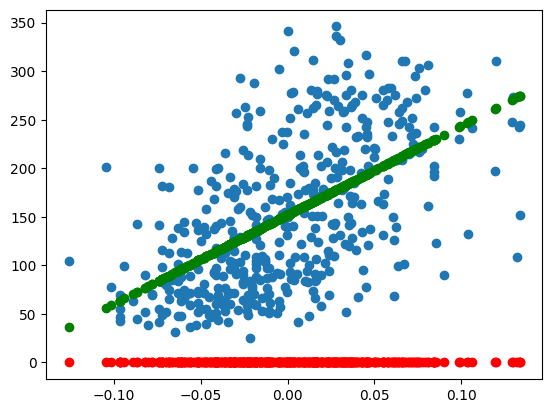

array([152.13348416, 916.13737455])

In [13]:
#Implementação de um modelo linear usando notação vetorial
#criando uma classe para fazer um modelo de regressão
#https://www.youtube.com/watch?v=GQgdWKtcMJg

from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear():
  def __init__(self):
    self.w = np.zeros((2,1))

  @staticmethod
  def addBias(X):
    bias = np.ones((X.shape[0],1))
    X_b = np.concatenate((bias, X), axis=1)
    return X_b

  def fit(self,X,y):
    # Adicionar uma coluna de 1s para representar o intercepto
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # Calcular os coeficientes usando álgebra linear
    self.w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

  def predict(self,X):
    X_b = self.addBias(X)
    y= X_b.dot(self.w)
    return y


plt.scatter(X8,y)

modelo = regressao_linear()
ypred = modelo.predict(X8)
print(rmse(y,ypred))
plt.scatter(X8,ypred, color='r')

#Testando  o modelo Ajustado
modelo.fit(X8,y)
ypred = modelo.predict(X8)
print(rmse(y,ypred))
plt.scatter(X8,ypred, color='g')

plt.show()

modelo.w


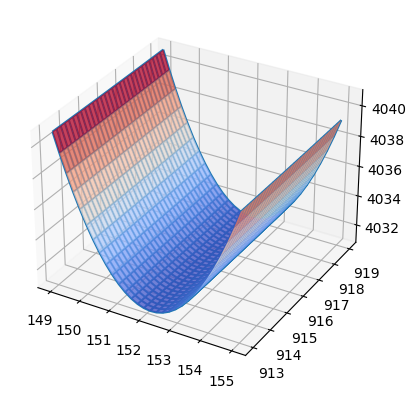

In [14]:
#Análise da função de erroURL
#Análise da função de erro de um algoritmo de aprendizado iterativo para regressão
#https://www.youtube.com/watch?v=5ZkWSlH56_Y


from sklearn.metrics import mean_squared_error
import numpy as np

w0 = np.linspace(149, 155, 30)
w1 = np.linspace(913,919, 30)

def z_function(W0, W1):
  modelo = regressao_linear()
  Erro = np.empty(W0.shape)
  for j in range(Erro.shape[0]):
    for k in range(Erro.shape[1]):
      modelo.w[0] = W0[j][k]
      modelo.w[1] = W1[j][k]
      ypred = modelo.predict(X8)
      mse = mean_squared_error(y, ypred)
      Erro[j][k] =mse
  return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

#plotar
ax.plot_wireframe(W0, W1, Erro)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.75, cmap='coolwarm', edgecolor='none')

plt.show()


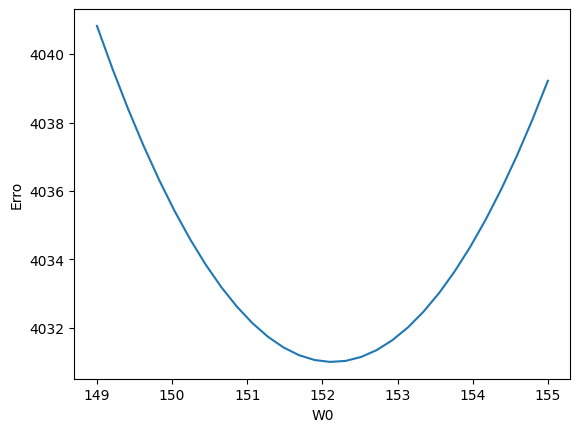

In [15]:
plt.ylabel("Erro")
plt.xlabel("W0")
i=8
plt.plot(W0[i,:],Erro[i,:])
plt.show()

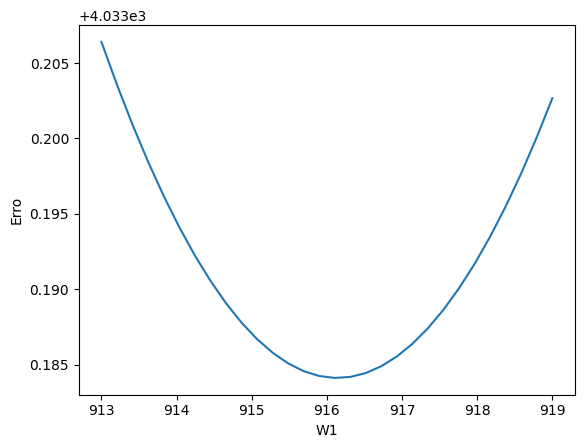

In [16]:
plt.ylabel("Erro")
plt.xlabel("W1")
i=8
plt.plot(W1[:,i],Erro[:,i])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) **

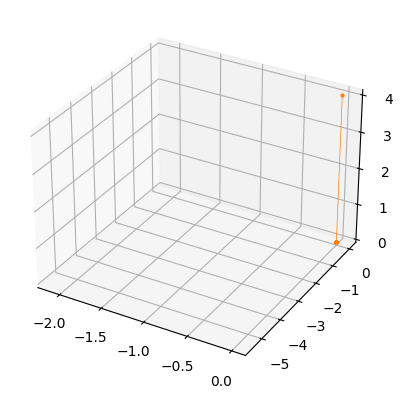

In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

class regressao_linear_vet():
    def __init__(self):
        self.w = np.zeros((2,1))
        self.wh = []

    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(20):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste
            ypred = self.predict(X)
            mse = mean_squared_error(y, ypred)
            self.wh.append([self.w[0,0], self.w[1,0], mse])

    def predict(self, X):
        X_b = self.addBias(X)
        y = X_b.dot(self.w)
        return y

w0 = np.linspace(0, 16, 20)
w1 = np.linspace(0, 2, 20)

def z_function(W0, W1):
    modelo = regressao_linear()
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = W0[j][k]
            modelo.w[1] = W1[j][k]
            ypred = modelo.predict(X8)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.5,
                cmap='coolwarm', edgecolor='none')

modelo = regressao_linear_vet()
modelo.fit(X8,y)
ypred = modelo.predict(X8)
wh = np.array(modelo.wh)
ax.plot(wh[:,0],wh[:,1],wh[:,2], marker='o', linewidth='0.5', markersize=2)
#ax.view_init(azim=0, elev=90)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) **

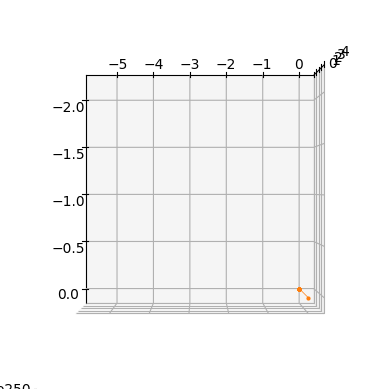

In [18]:
#mesmo grafico com a visão de cima, ajuste do erro com as interações

ax = plt.axes(projection="3d")
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

ax.plot_wireframe(W0, W1, Erro, alpha=0.5)
ax.plot_surface(W0, W1, Erro, rstride=1, cstride=1, alpha=0.5,
                cmap='coolwarm', edgecolor='none')

modelo = regressao_linear_vet()
modelo.fit(X8,y)
ypred = modelo.predict(X8)
wh = np.array(modelo.wh)
ax.plot(wh[:,0],wh[:,1],wh[:,2], marker='o', linewidth='0.5', markersize=2)
ax.view_init(azim=0, elev=90)

plt.show()

O **modelo de Regressão do sklearn** tem os mesmos coeficentes que calculamos, coeficiente Angular e Linear:
152.13348416289585 [916.13737455]

In [ ]:
#Utilizando  clase de regressão linar do sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(X8, y)
ypred = modelo.predict(X8)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

4030.998722591287
152.13348416289585 [916.13737455]


In [ ]:
#USANDO O MODLEO PARA TODAS AS CARACTERISTICA E NÃO SÓ A 8
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

4030.998722591287
152.13348416289585 [916.13737455]
